In [3]:
# 2023/12/19
# zhangzhong
# show the t-SNE of MNIST, CIFAR-10, FashionMNIST

import torch
from torch import nn, Tensor
from tsnecuda import TSNE
from matplotlib import pyplot as plt
from mytorch import utils
from mytorch.data.mnist import FashionMNISTDataset, MNISTDataset
from mytorch.data.cifar10 import CIFAR10Dataset
from mytorch.data.svhn import SVHNDataset

def draw_tsne(data: Tensor, labels: Tensor, name: str | None = None):
    data = data.cpu().flatten(start_dim=1)
    batch_size, feature_size = data.shape
    assert len(labels.shape) == 1
    assert labels.shape[0] == batch_size
    
    # 原来t-SNE每次的输出是随机的
    tsne = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(data)
    figure, ax = plt.subplots()
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
    # https://matplotlib.org/stable/gallery/color/colormap_reference.html
    scatter = ax.scatter(tsne[:, 0], tsne[:, 1], s=1, c=labels, cmap='tab10')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(*scatter.legend_elements())
    if name is not None:
        utils.mysavefig(name)
    else:
        plt.show()

Using downloaded and verified file: datasets/svhn/train_32x32.mat
Using downloaded and verified file: datasets/svhn/test_32x32.mat
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


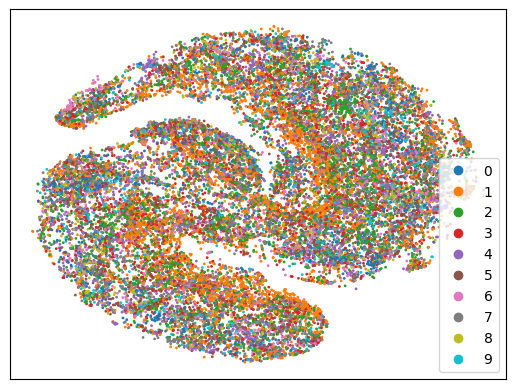

In [10]:
svhn = SVHNDataset()
print(type(svhn.test_dataset.data))
print(type(svhn.test_dataset.labels))
print(type(torch.tensor(svhn.test_dataset.data)))
draw_tsne(torch.tensor(svhn.test_dataset.data), torch.tensor(svhn.test_dataset.labels))

Files already downloaded and verified
Files already downloaded and verified


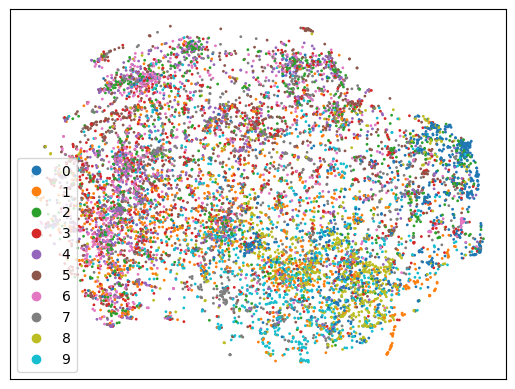

In [49]:
cifar10 = CIFAR10Dataset()
type(cifar10.cifar_test.data)
type(torch.tensor(cifar10.cifar_test.data))
type(torch.tensor(cifar10.cifar_test.targets))
draw_tsne(torch.tensor(cifar10.cifar_test.data), torch.tensor(cifar10.cifar_test.targets))

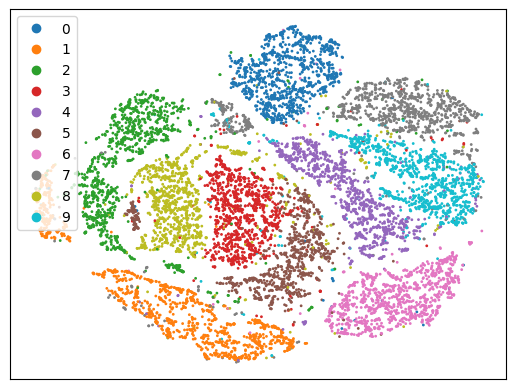

In [50]:
mnist = MNISTDataset()
type(mnist.testing_data.data)
draw_tsne(data=mnist.testing_data.data, labels=mnist.testing_data.targets)

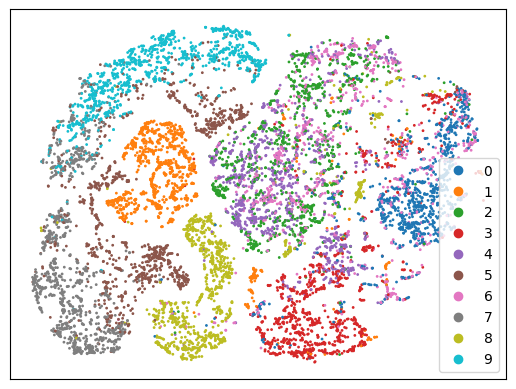

In [51]:
fashion_mnist = FashionMNISTDataset()
draw_tsne(data=fashion_mnist.testing_data.data, labels=fashion_mnist.testing_data.targets)

Using downloaded and verified file: datasets/svhn/train_32x32.mat
Using downloaded and verified file: datasets/svhn/test_32x32.mat


AttributeError: 'SVHN' object has no attribute 'targets'